In [1]:
!pip install "deeplake<4"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.9/642.9 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 94.4 MB/s eta 0:00:00
  Created wheel for deeplake: filename=deeplake-3.9.47-py3-none-any.whl size=772255 sha256=6381923482cc879d0e6ff4e32f0b5954533708ef8327ff64dc471c947e1d1741
  Stored in directory: /root/.cache/pip/wheels/b6/47/40/dd9100e601d58493d82b78ce5d797aad86a72c3ae2c664527e
Successfully built deeplake
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:

In [2]:
import deeplake

/usr/local/lib/python3.11/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.2.14) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [3]:
ds_train = deeplake.load('hub://activeloop/fer2013-train')
ds_val = deeplake.load('hub://activeloop/fer2013-public-test')
ds_test = deeplake.load('hub://activeloop/fer2013-private-test')
ds_train.summary()

-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-train



-

hub://activeloop/fer2013-train loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-public-test



\

hub://activeloop/fer2013-public-test loaded successfully.



Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-private-test



\

hub://activeloop/fer2013-private-test loaded successfully.

Dataset(path='hub://activeloop/fer2013-train', read_only=True, tensors=['images', 'labels'])

 tensor      htype          shape        dtype  compression
 -------    -------        -------      -------  ------- 
 images      image     (28709, 48, 48)   uint8    None   
 labels   class_label    (28709, 1)     uint32    None   


In [4]:
ds_val.summary()

Dataset(path='hub://activeloop/fer2013-public-test', read_only=True, tensors=['images', 'labels'])

 tensor      htype         shape        dtype  compression
 -------    -------       -------      -------  ------- 
 images      image     (3589, 48, 48)   uint8    None   
 labels   class_label    (3589, 1)     uint32    None   


In [5]:
ds_test.summary()

Dataset(path='hub://activeloop/fer2013-private-test', read_only=True, tensors=['images', 'labels'])

 tensor      htype         shape        dtype  compression
 -------    -------       -------      -------  ------- 
 images      image     (3589, 48, 48)   uint8    None   
 labels   class_label    (3589, 1)     uint32    None   


In [6]:
classes_str = ds_train.info['classes']
pairs = classes_str.split(',')

label_map = {}
for pair in pairs:
    key_str, value = pair.strip().split('=')
    key = int(key_str)
    label_map[key] = value

print(label_map)

for sample in ds_train:
  print(sample.images.shape)
  print(sample.images.numpy())
  print(sample.labels.numpy())
  break

{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
(48, 48)
[[ 70  80  82 ...  52  43  41]
 [ 65  61  58 ...  56  52  44]
 [ 50  43  54 ...  49  56  47]
 ...
 [ 91  65  42 ...  72  56  43]
 [ 77  82  79 ... 105  70  46]
 [ 77  72  84 ... 106 109  82]]
[0]


/usr/local/lib/python3.11/dist-packages/deeplake/core/tensor.py:719: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


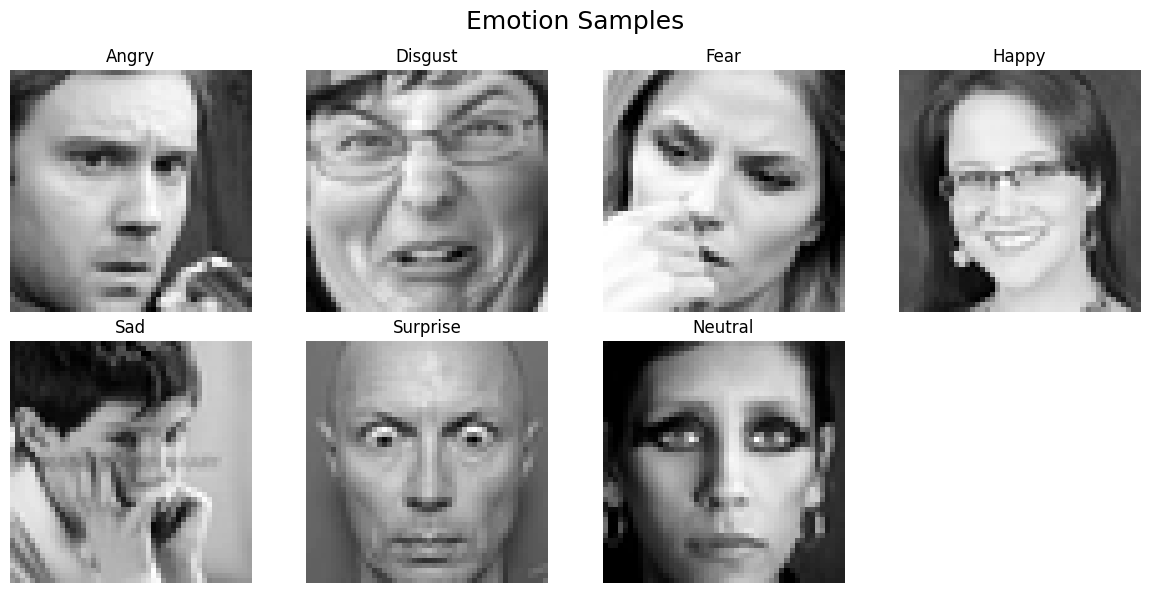

In [7]:
import matplotlib.pyplot as plt

def show_one_image_per_label(ds, label_map, grid_rows=3, grid_cols=3):
    images = []
    titles = []

    # 1 ảnh đại diện cho mỗi label
    for label_idx, label_name in label_map.items():
        found = False
        for i in range(len(ds)):
            if ds.labels[i].numpy() == label_idx:
                img = ds.images[i].numpy().squeeze()
                images.append(img)
                titles.append(label_name)
                found = True
                break
        if not found:
            print(f"[No image found for label: {label_name}]")

    # Vẽ 1 bảng duy nhất
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 3, grid_rows * 3))
    fig.suptitle("Emotion Samples", fontsize=18)

    idx = 0
    for r in range(grid_rows):
        for c in range(grid_cols):
            ax = axes[r, c]
            if idx < len(images):
                ax.imshow(images[idx], cmap='gray')
                ax.set_title(titles[idx])
                ax.axis('off')
            else:
                ax.axis('off')
            idx += 1

    plt.tight_layout()
    plt.show()

show_one_image_per_label(ds_train, label_map, grid_rows=2, grid_cols=4)

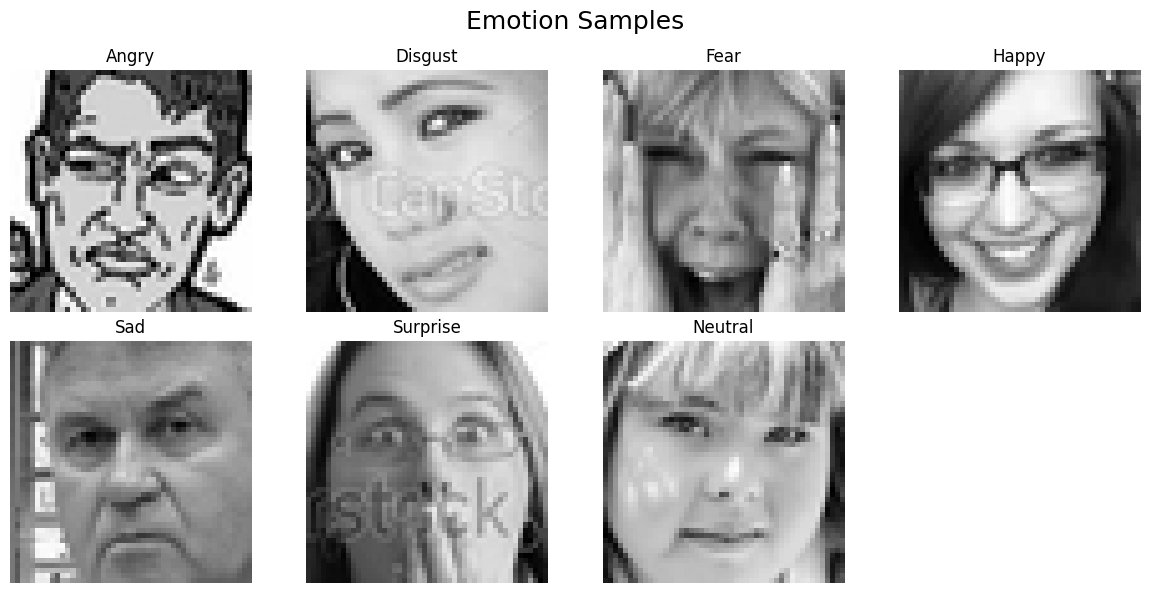

In [8]:
show_one_image_per_label(ds_val, label_map, grid_rows=2, grid_cols=4)

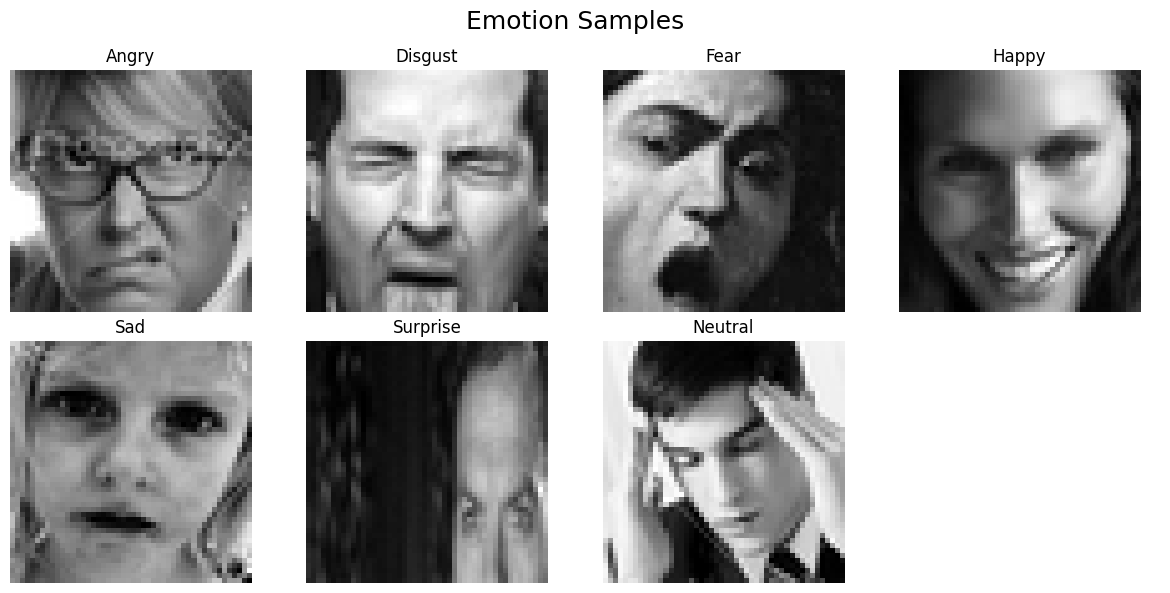

In [9]:
show_one_image_per_label(ds_test, label_map, grid_rows=2, grid_cols=4)

In [10]:
from collections import Counter

def draw(ds, name="Train"):
    label_counts = Counter()
    label_names = {}
    
    for i, sample in enumerate(ds):
        label_idx = int(sample.labels.numpy())  # Convert numpy array to integer
        label_counts[label_idx] += 1
        if label_map[label_idx] not in label_names.keys():
            label_names[label_map[label_idx]] = 1
        label_names[label_map[label_idx]] += 1
    
    print(label_names)

    emotion_names = []
    counts = []
    
    for idx in sorted(label_map.keys()):
        emotion_names.append(label_map[idx])
        counts.append(label_counts.get(idx, 0))
    
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
    
    plt.figure(figsize=(10,6))
    plt.bar(emotion_names, counts, color=colors)
    plt.xlabel('Emotion')
    plt.ylabel('Number of Images')
    plt.title(f'Distribution of Emotions in FER2013 {name} Set')
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipykernel_19/223803049.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_idx = int(sample.labels.numpy())  # Convert numpy array to integer


{'Angry': 3996, 'Fear': 4098, 'Sad': 4831, 'Neutral': 4966, 'Happy': 7216, 'Surprise': 3172, 'Disgust': 437}


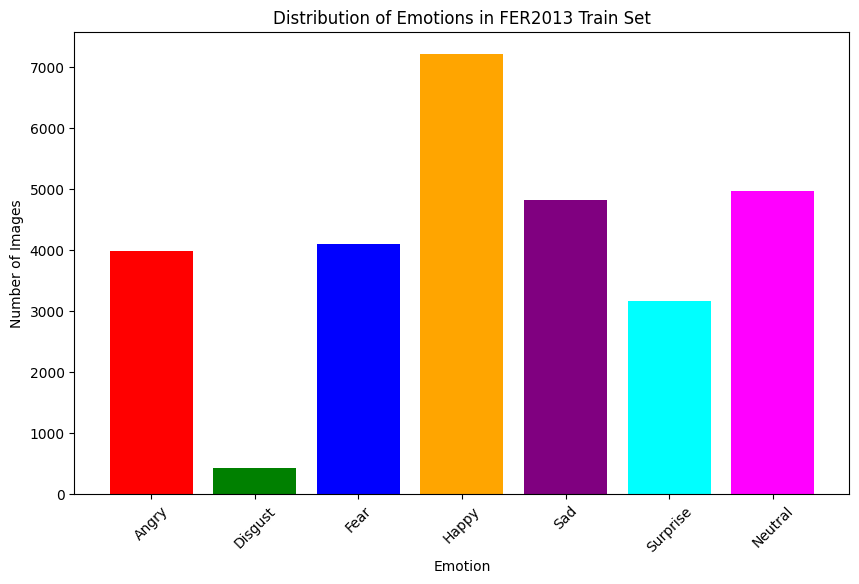

In [11]:
draw(ds_train)

/tmp/ipykernel_19/223803049.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_idx = int(sample.labels.numpy())  # Convert numpy array to integer


{'Angry': 468, 'Disgust': 57, 'Sad': 654, 'Neutral': 608, 'Happy': 896, 'Fear': 497, 'Surprise': 416}


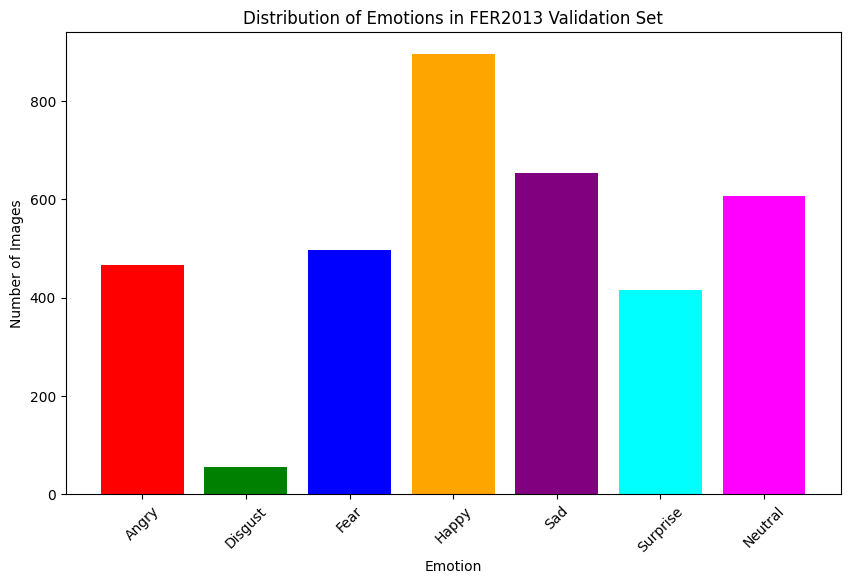

In [12]:
draw(ds_val, name="Validation")

/tmp/ipykernel_19/223803049.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_idx = int(sample.labels.numpy())  # Convert numpy array to integer


{'Angry': 492, 'Surprise': 417, 'Neutral': 627, 'Sad': 595, 'Fear': 529, 'Happy': 880, 'Disgust': 56}


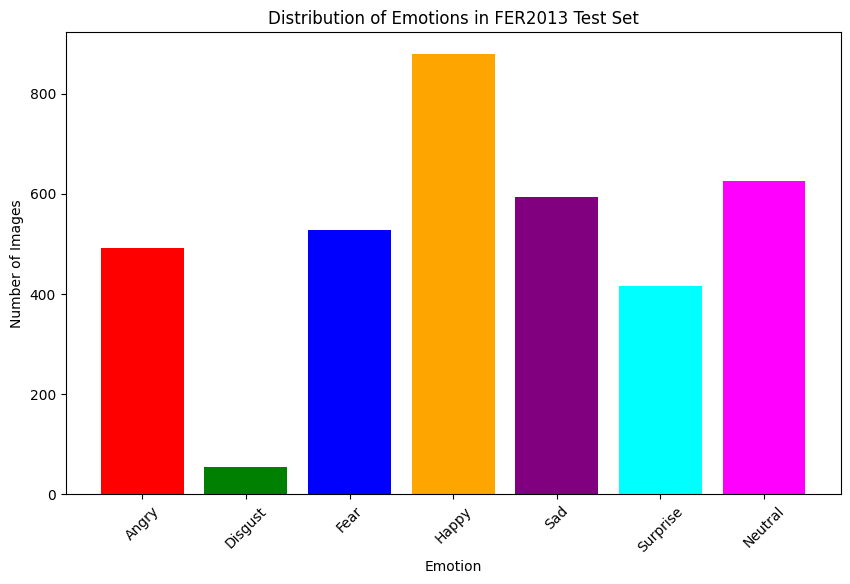

In [13]:
draw(ds_test, name="Test")

In [14]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, Dataset, random_split

In [15]:
NUMBER_SAMPE = None
EPOCHS = 200
BATCH_SIZE = 32
LEANING_RATE = 0.0001
LOG_TRAINING_PATH = f"/kaggle/working/CaoHoc_Noron_EmoNeXt.txt"

In [16]:
from PIL import Image

class FER2013Dataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]

        img = Image.fromarray((img).astype(np.uint8))
        label = torch.tensor(label, dtype=torch.long)

        if self.transform:
            img = self.transform(img)

        return img, label

In [17]:
images_train = []
labels_train = []
for sample in ds_train:
    images_train.append(sample.images.numpy())
    labels_train.append(sample.labels.numpy()[0])

if NUMBER_SAMPE:
    images_train = images_train[:NUMBER_SAMPE]
    labels_train = labels_train[:NUMBER_SAMPE]

images_val = []
labels_val = []
for sample in ds_val:
    images_val.append(sample.images.numpy())
    labels_val.append(sample.labels.numpy()[0])

if NUMBER_SAMPE:
    images_val = images_val[:NUMBER_SAMPE]
    labels_val = labels_val[:NUMBER_SAMPE]


images_test = []
labels_test = []
for sample in ds_test:
    images_test.append(sample.images.numpy())
    labels_test.append(sample.labels.numpy()[0])

if NUMBER_SAMPE:
    images_test = images_test[:NUMBER_SAMPE]
    labels_test = labels_test[:NUMBER_SAMPE]

In [18]:
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [19]:
train_ds = FER2013Dataset(images_train, labels_train, transform=transform)
val_ds = FER2013Dataset(images_val, labels_val, transform=transform)
test_ds = FER2013Dataset(images_test, labels_test, transform=transform)

print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

28709
3589
3589


In [20]:
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

In [21]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.ops import StochasticDepth

class Block(nn.Module):
    r"""ConvNeXt Block. There are two equivalent implementations:
    (1) DwConv -> LayerNorm (channels_first) -> 1x1 Conv -> GELU -> 1x1 Conv; all in (N, C, H, W)
    (2) DwConv -> Permute to (N, H, W, C); LayerNorm (channels_last) -> Linear -> GELU -> Linear; Permute back
    We use (2) as we find it slightly faster in PyTorch

    Args:
        dim (int): Number of input channels.
        drop_path (float): Stochastic depth rate. Default: 0.0
        layer_scale_init_value (float): Init value for Layer Scale. Default: 1e-6.
    """

    def __init__(self, dim, drop_path=0.0, layer_scale_init_value=1e-6):
        super().__init__()
        self.dwconv = nn.Conv2d(
            dim, dim, kernel_size=7, padding=3, groups=dim
        )  # depthwise conv
        self.norm = LayerNorm(dim, eps=1e-6)
        self.pwconv1 = nn.Linear(
            dim, 4 * dim
        )  # pointwise/1x1 convs, implemented with linear layers
        self.act = nn.GELU()
        self.pwconv2 = nn.Linear(4 * dim, dim)
        self.gamma = (
            nn.Parameter(layer_scale_init_value * torch.ones((dim)), requires_grad=True)
            if layer_scale_init_value > 0
            else None
        )
        self.stochastic_depth = StochasticDepth(drop_path, "row")

    def forward(self, x):
        input = x
        x = self.dwconv(x)
        x = x.permute(0, 2, 3, 1)  # (N, C, H, W) -> (N, H, W, C)
        x = self.norm(x)
        x = self.pwconv1(x)
        x = self.act(x)
        x = self.pwconv2(x)
        if self.gamma is not None:
            x = self.gamma * x
        x = x.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)

        x = input + self.stochastic_depth(x)
        return x

class SELayer(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SELayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid(),
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class LayerNorm(nn.Module):
    r"""LayerNorm that supports two data formats: channels_last (default) or channels_first.
    The ordering of the dimensions in the inputs. channels_last corresponds to inputs with
    shape (batch_size, height, width, channels) while channels_first corresponds to inputs
    with shape (batch_size, channels, height, width).
    """

    def __init__(self, normalized_shape, eps=1e-6, data_format="channels_last"):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(normalized_shape))
        self.bias = nn.Parameter(torch.zeros(normalized_shape))
        self.eps = eps
        self.data_format = data_format
        if self.data_format not in ["channels_last", "channels_first"]:
            raise NotImplementedError
        self.normalized_shape = (normalized_shape,)

    def forward(self, x):
        if self.data_format == "channels_last":
            return F.layer_norm(
                x, self.normalized_shape, self.weight, self.bias, self.eps
            )
        elif self.data_format == "channels_first":
            u = x.mean(1, keepdim=True)
            s = (x - u).pow(2).mean(1, keepdim=True)
            x = (x - u) / torch.sqrt(s + self.eps)
            x = self.weight[:, None, None] * x + self.bias[:, None, None]
            return x

class DotProductSelfAttention(nn.Module):
    def __init__(self, input_dim):
        super(DotProductSelfAttention, self).__init__()
        self.input_dim = input_dim
        self.norm = nn.LayerNorm(input_dim)
        self.query = nn.Linear(input_dim, input_dim)
        self.key = nn.Linear(input_dim, input_dim)
        self.value = nn.Linear(input_dim, input_dim)

    def forward(self, x):
        x = self.norm(x)
        query = self.query(x)
        key = self.key(x)
        value = self.value(x)

        scale = 1 / math.sqrt(math.sqrt(self.input_dim))
        scores = torch.matmul(query, key.transpose(-2, -1)) * scale
        attention_weights = torch.softmax(scores, dim=-1)

        attended_values = torch.matmul(attention_weights, value)
        output = attended_values + x

        return output, attention_weights


class EmoNeXt(nn.Module):
    def __init__(
        self,
        in_chans=3,
        num_classes=1000,
        depths=None,
        dims=None,
        drop_path_rate=0.0,
        layer_scale_init_value=1e-6,
    ):
        super().__init__()

        if dims is None:
            dims = [96, 192, 384, 768]
        if depths is None:
            depths = [3, 3, 9, 3]

        # Spatial transformer localization-network
        self.localization = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=7),
            nn.BatchNorm2d(8),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(8, 10, kernel_size=5),
            nn.BatchNorm2d(10),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
        )

        # Regressor for the 3 * 2 affine matrix
        self.fc_loc = nn.Sequential(
            nn.Linear(10 * 8 * 8, 32), nn.ReLU(True), nn.Linear(32, 3 * 2)
        )

        self.downsample_layers = (
            nn.ModuleList()
        )  # stem and 3 intermediate downsampling conv layers
        stem = nn.Sequential(
            nn.Conv2d(in_chans, dims[0], kernel_size=4, stride=4),
            LayerNorm(dims[0], eps=1e-6, data_format="channels_first"),
        )
        self.downsample_layers.append(stem)
        for i in range(3):
            downsample_layer = nn.Sequential(
                LayerNorm(dims[i], eps=1e-6, data_format="channels_first"),
                nn.Conv2d(dims[i], dims[i + 1], kernel_size=2, stride=2),
                SELayer(dims[i + 1]),
            )
            self.downsample_layers.append(downsample_layer)

        self.stages = (
            nn.ModuleList()
        )  # 4 feature resolution stages, each consisting of multiple residual blocks
        dp_rates = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]
        cur = 0
        for i in range(4):
            stage = nn.Sequential(
                *[
                    Block(
                        dim=dims[i],
                        drop_path=dp_rates[cur + j],
                        layer_scale_init_value=layer_scale_init_value,
                    )
                    for j in range(depths[i])
                ]
            )
            self.stages.append(stage)
            cur += depths[i]

        self.norm = nn.LayerNorm(dims[-1], eps=1e-6)  # final norm layer
        self.attention = DotProductSelfAttention(dims[-1])
        self.head = nn.Linear(dims[-1], num_classes)

        for m in self.modules():
            if isinstance(m, (nn.Conv2d, nn.Linear)):
                nn.init.trunc_normal_(m.weight, std=0.02)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

        self.fc_loc[2].weight.data.zero_()
        self.fc_loc[2].bias.data.copy_(
            torch.tensor([1, 0, 0, 0, 1, 0], dtype=torch.float)
        )

    def stn(self, x):
        xs = self.localization(x)
        xs = xs.view(-1, 10 * 8 * 8)
        theta = self.fc_loc(xs)
        theta = theta.view(-1, 2, 3)

        grid = F.affine_grid(theta, x.size(), align_corners=True)
        x = F.grid_sample(x, grid, align_corners=True)

        return x

    def forward_features(self, x):
        for i in range(4):
            x = self.downsample_layers[i](x)
            x = self.stages[i](x)
        return self.norm(
            x.mean([-2, -1])
        )  # global average pooling, (N, C, H, W) -> (N, C)

    def forward(self, x, labels=None):
        x = self.stn(x)
        x = self.forward_features(x)
        _, weights = self.attention(x)
        logits = self.head(x)

        if labels is not None:
            mean_attention_weight = torch.mean(weights)
            attention_loss = torch.mean((weights - mean_attention_weight) ** 2)

            loss = F.cross_entropy(logits, labels, label_smoothing=0.2) + attention_loss
            return torch.argmax(logits, dim=1), logits, loss

        return torch.argmax(logits, dim=1), logits

In [22]:
!pip install torchinfo

In [23]:
from torchinfo import summary

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for imgs, labels in loader:     
            imgs, labels = imgs.to(device), labels.to(device)
            preds, _, loss = model(imgs, labels)
    
            running_loss += loss.item() * imgs.size(0)

            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    avg_loss = running_loss / total
    acc = correct / total
    f1 = f1_score(all_labels, all_preds, average='macro')
    
    return avg_loss, acc, f1

def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        print(imgs.shape)
        preds, _, loss = model(imgs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    
    avg_loss = running_loss / total
    acc = correct / total
    f1 = f1_score(all_labels, all_preds, average='macro')

    val_loss, val_acc, val_f1 = validate(model, loader, criterion, device)
    
    return avg_loss, acc, f1,  val_loss, val_acc, val_f1

In [24]:
log_file = open(LOG_TRAINING_PATH, "a")
log_file.write("\n**Start***\n")
log_file.flush()

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmoNeXt(num_classes=7).to(device)

# Ví dụ input: batch_size=1, channel=1, 48x48
summary(model, input_size=(32, 3, 48, 48))

Layer (type:depth-idx)                        Output Shape              Param #
EmoNeXt                                       [32]                      --
├─Sequential: 1-1                             [32, 10, 8, 8]            --
│    └─Conv2d: 2-1                            [32, 8, 42, 42]           1,184
│    └─BatchNorm2d: 2-2                       [32, 8, 42, 42]           16
│    └─MaxPool2d: 2-3                         [32, 8, 21, 21]           --
│    └─ReLU: 2-4                              [32, 8, 21, 21]           --
│    └─Conv2d: 2-5                            [32, 10, 17, 17]          2,010
│    └─BatchNorm2d: 2-6                       [32, 10, 17, 17]          20
│    └─MaxPool2d: 2-7                         [32, 10, 8, 8]            --
│    └─ReLU: 2-8                              [32, 10, 8, 8]            --
├─Sequential: 1-2                             [32, 6]                   --
│    └─Linear: 2-9                            [32, 32]                  20,512
│    └─ReL

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEANING_RATE)

train_losses = []
val_losses = []
train_accs = []
val_accs = []
train_f1s = []
val_f1s = []

# Huấn luyện giai đoạn 1 (freeze backbone)
for epoch in range(EPOCHS):
    msg = ""
    train_loss, train_acc, train_f1, val_loss, val_acc, val_f1 = train_one_epoch(model, train_loader, criterion, optimizer, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    train_f1s.append(train_f1)
    val_f1s.append(val_f1)

    print(f"Phase 1 - Epoch {epoch+1}/{EPOCHS}")
    print(f"  Train loss: {train_loss:.4f}, acc: {train_acc:.4f}, f1: {train_f1:.4f}")
    print(f"  Val   loss: {val_loss:.4f}, acc: {val_acc:.4f}, f1: {val_f1:.4f}")

    msg += f"Phase 1 - Epoch {epoch+1}/{EPOCHS}\n"
    msg += f"  Train loss: {train_loss:.4f}, acc: {train_acc:.4f}, f1: {train_f1:.4f}\n"
    msg += f"  Val   loss: {val_loss:.4f}, acc: {val_acc:.4f}, f1: {val_f1:.4f}\n"

    log_file.write(msg)
    log_file.flush()

torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 48, 48])
torch.Size([32, 3, 4

In [27]:
import json

metrics_data = {
    "train_losses": train_losses,
    "val_losses": val_losses,
    "train_accs": train_accs,
    "val_accs": val_accs,
    "train_f1s": train_f1s,
    "val_f1s": val_f1s
}

with open("data.json", "w") as f:
    json.dump(metrics_data, f)

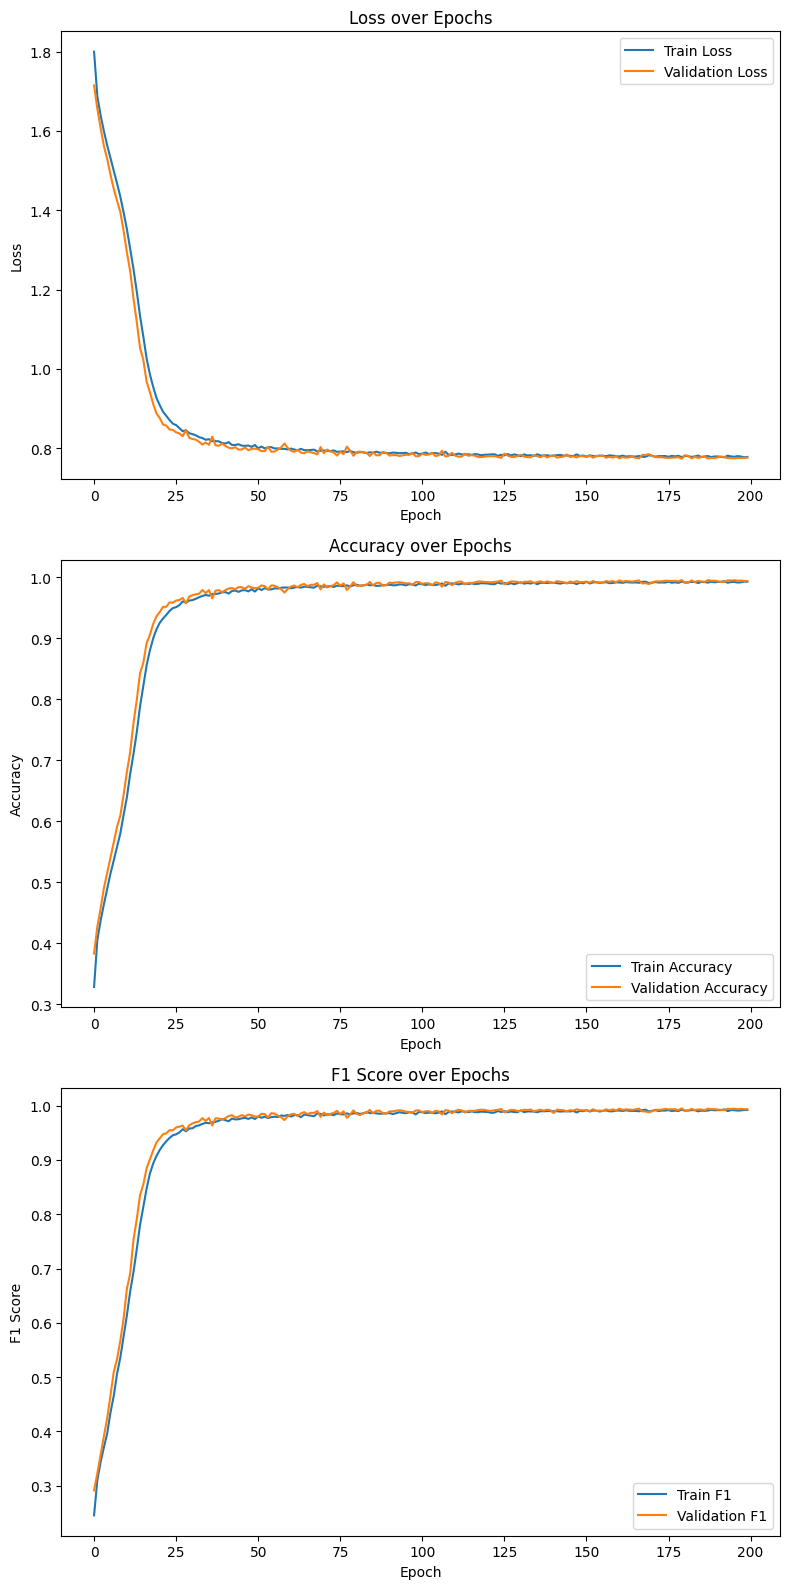

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(8, 16))

# Loss
axes[0].plot(train_losses, label='Train Loss')
axes[0].plot(val_losses, label='Validation Loss')
axes[0].set_title('Loss over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Accuracy
axes[1].plot(train_accs, label='Train Accuracy')
axes[1].plot(val_accs, label='Validation Accuracy')
axes[1].set_title('Accuracy over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# F1 Score
axes[2].plot(train_f1s, label='Train F1')
axes[2].plot(val_f1s, label='Validation F1')
axes[2].set_title('F1 Score over Epochs')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('F1 Score')
axes[2].legend()

plt.tight_layout()
plt.savefig('training_metrics.png')

  Test  loss: 1.7703, acc: 0.5626, f1: 0.5597
Saving file log at /kaggle/working/CaoHoc_Noron_EmoNeXt.txt



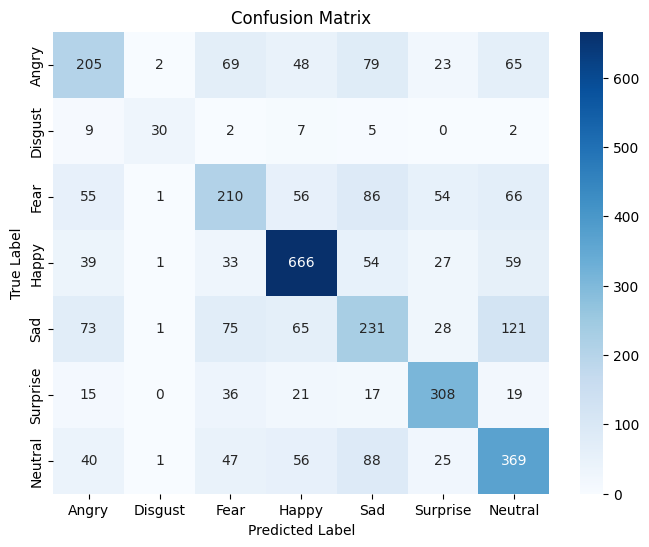

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_all_preds_and_labels(model, loader, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            preds, _, loss = model(imgs, labels)

            running_loss += loss.item() * imgs.size(0)
            correct += preds.eq(labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / total
    acc = correct / total
    f1 = f1_score(all_labels, all_preds, average='macro')
    
    print(f"  Test  loss: {avg_loss:.4f}, acc: {acc:.4f}, f1: {f1:.4f}")
    msg = f"  Test  loss: {avg_loss:.4f}, acc: {acc:.4f}, f1: {f1:.4f}\n"
    
    log_file.write(msg)
    log_file.flush()
    
    return np.array(all_preds), np.array(all_labels)

preds, labels = get_all_preds_and_labels(model, test_loader, device)
cm = confusion_matrix(labels, preds)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
pd.DataFrame(cm).to_csv('confusion_matrix.csv')

print(f"Saving file log at {LOG_TRAINING_PATH}\n")
log_file.close()

In [30]:
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, 'checkpoint_EmoNeXt.pt')